In [1]:
import pandas as pd
import statistics as sts
import seaborn as srn

In [8]:
# Importando dados
dataset = pd.read_csv('../csv/funcionarios_nivel2.csv')

# vendo o head da tabela
dataset.head()

,Nome,Idade,Salário,Setor,Ativo
0,João,25,3000.0,TI,sim
1,Maria,-5,4000.0,RH,não
2,Pedro,45,NaN,Comercial,sim
3,Ana,30,999999.0,menos,NaN
4,Carlos,150,2800.0,ti,sim


In [9]:
# Vendo os valores nulos
dataset.isnull().sum()

Nome       0
Idade      0
Salário    2
Setor      0
Ativo      2
dtype: int64

In [ ]:
# Vendo se há valores (identificadoes) duplicados
dataset.duplicated().sum() 

np.int64(0)

<Axes: ylabel='Idade'>

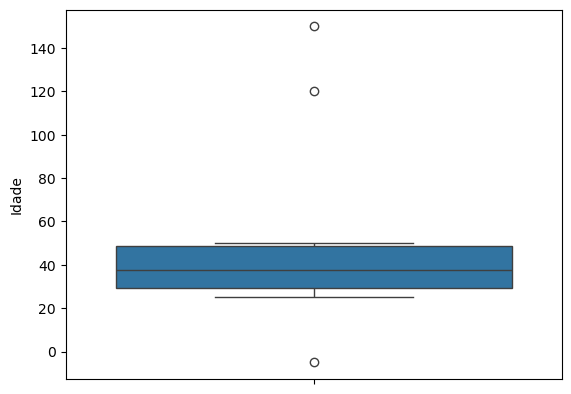

In [25]:
# Analisando Gráficos da Idade
srn.boxplot(dataset["Idade"])

<!-- O que corrigir -->
- Idades maiores 120 anos e menores que 0
- 2 Pontos específicos
- Mudar essas idades pela media das idades

In [28]:
# Analizando os pontos específicos
dataset.loc[(dataset["Idade"] < 0)|(dataset["Idade"] > 120)]

,Nome,Idade,Salário,Setor,Ativo
1,Maria,-5,4000.0,RH,não
4,Carlos,150,2800.0,ti,sim


In [35]:
# pegando a media das idades
media = sts.mean(dataset["Idade"])
media

44.8

In [36]:
# Substituindo pela parte inteira da media
dataset.loc[(dataset["Idade"] < 0 )|(dataset["Idade"] > 120), "Idade"] = int(media)

In [38]:
# Verificando
dataset.loc[(dataset["Idade"] < 0)|(dataset["Idade"] > 120)]

,Nome,Idade,Salário,Setor,Ativo


In [42]:
# Iniciando Salário
# Setando Mediana do salário

mediana = sts.median(dataset["Salário"])
mediana

3350.0

In [50]:
# Substituindo salários vazios pela mediana
dataset.fillna({"Salário": mediana}, inplace=True)

In [52]:
# Substituindo salário exorbitante pela mediana
dataset.loc[dataset["Salário"] > 99999, "Salário"] = mediana

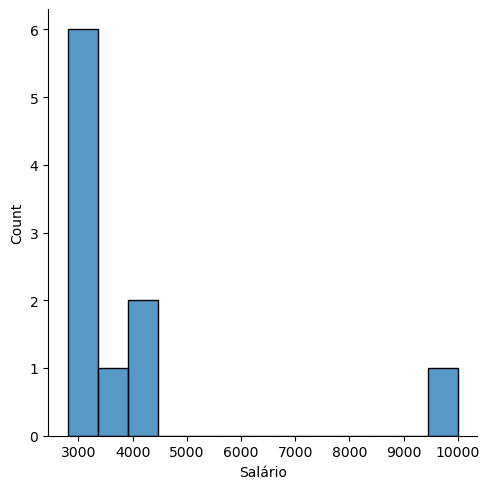

In [ ]:
# Verificando com gráfico se há algum salário maior que 10000
# Salário até 10000 ainda é aceitavel  pelo meu ponto de vista!
srn.displot(dataset["Salário"])

In [54]:
# Iniciando SETOR
# agrupando para ver os setores e quais são os faltantes
agrupado = dataset.groupby(["Setor"]).size()
agrupado

Setor
Comercial     1
Finance       1
Financeiro    1
RH            2
T.I.          1
TI            1
financeiro    1
menos         1
ti            1
dtype: int64

- Padronizar Setores para:
- TI
- Fincanceiro
- Comercial
- RH

In [55]:
# Padronizando TI
dataset.loc[dataset["Setor"].isin(['T.I.','ti']), "Setor"] = "TI"

In [56]:
# Padronizando Financeiro
dataset.loc[dataset["Setor"].isin(['financeiro','Finance']), "Setor"] = "Financeiro"

In [58]:
# Verificando quais faltam
agrupado = dataset.groupby(["Setor"]).size()
agrupado

Setor
Comercial     1
Financeiro    3
RH            2
TI            3
menos         1
dtype: int64

In [60]:
# Pegando a moda para mudar o setor "menos"
moda = sts.mode(dataset["Setor"]) 
moda

'TI'

In [61]:
# Trocando "menos" pela moda
dataset.loc[dataset["Setor"] == 'menos', "Setor"] = moda

In [62]:
# Verificando
agrupado = dataset.groupby(["Setor"]).size()
agrupado

Setor
Comercial     1
Financeiro    3
RH            2
TI            4
dtype: int64

Verificar ativos:
- Padronizar caso não haja padronização
- Substituir valores nulos

In [64]:
# Quantidade de nulos
dataset["Ativo"].isnull().sum()

np.int64(2)

In [65]:
# Ver grupos
agrupado = dataset.groupby(["Ativo"]).size()
agrupado 

Ativo
nao    1
não    2
sim    5
dtype: int64

In [66]:
# Mudando nao para não
dataset.loc[dataset["Ativo"] == "nao", "Ativo"] = "não"

In [69]:
# verificando
agrupado = dataset.groupby(["Ativo"]).size()
agrupado 

Ativo
não    3
sim    5
dtype: int64

In [71]:
# Trocando valores vazios por sim (moda)
dataset.fillna({"Ativo":"sim"}, inplace=True)